# Importar arquivos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp /content/drive/MyDrive/desafio_1.zip /content

In [7]:
!unzip desafio_1.zip

Archive:  desafio_1.zip
  inflating: housing.csv             
  inflating: instruções.txt        


# Etapa I

## Bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Bibliotecas adicionais

In [3]:
import seaborn as sns
import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Carregando a base de dados

In [8]:
dados = pd.read_csv('/content/housing.csv')

In [ ]:
dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Printando a base de dados

In [ ]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Tratar base de dados

In [ ]:
dados.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Definindo os valores de ocean_proximity

#### Transformando os dados categóricos de ocean_proximity em dados numéricos

##### Gráfico para visualizar a média do valor da casa com relação a proximidade do oceano

<ipython-input-7-fa4e33b34b8c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x='ocean_proximity', y='median_house_value', ci=None)


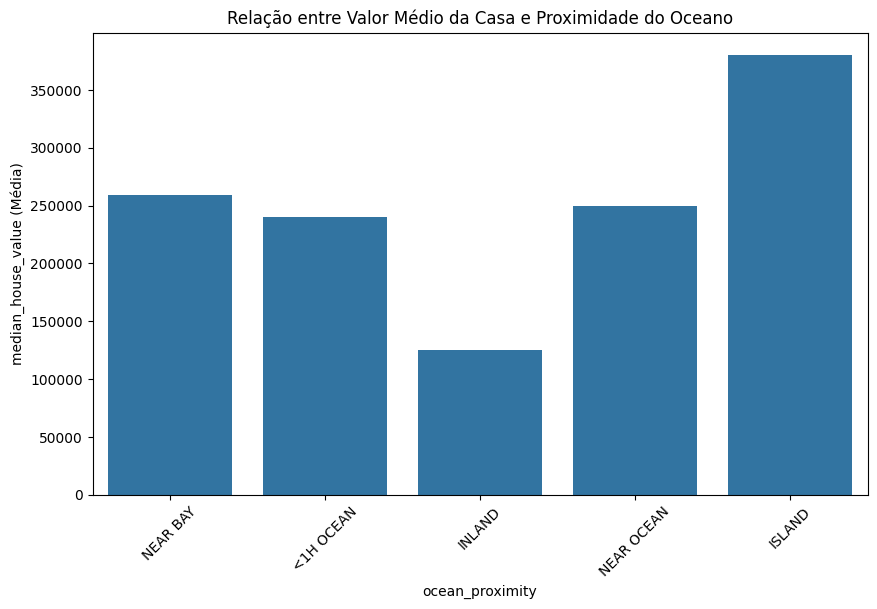

In [ ]:
# Gráfico de barras para visualizar a média do valor médio da casa em relação à proximidade do oceano
plt.figure(figsize=(10, 6))
sns.barplot(data=dados, x='ocean_proximity', y='median_house_value', ci=None)
plt.title('Relação entre Valor Médio da Casa e Proximidade do Oceano')
plt.xlabel('ocean_proximity')
plt.ylabel('median_house_value (Média)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dados.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

##### Gráfico da quantidade de cada caso

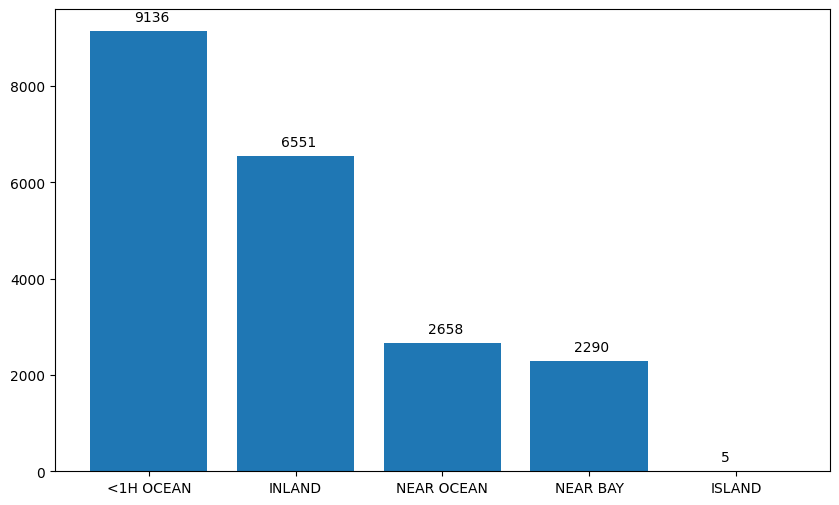

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dados.ocean_proximity.value_counts().index, dados.ocean_proximity.value_counts().values)

for i, count in enumerate(dados.ocean_proximity.value_counts()):
    plt.text(i - 0.1, count + 200, str(count))

plt.show()

In [9]:
label_enconder = LabelEncoder()
labels_turma = label_enconder.fit_transform(dados.ocean_proximity)
labels_turma

array([3, 3, 3, ..., 1, 1, 1])

##### Definindo um índice para cada caso

In [10]:
dados1 = dados.copy()
dados1['proximidade_oceano'] = labels_turma
dados1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximidade_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


##### Códificando o índice em one-hot

In [11]:
dados2 = dados1.copy()
one_hot_enconder = OneHotEncoder()
feature_array = one_hot_enconder.fit_transform(dados2[['proximidade_oceano']]).toarray()
features_df = pd.DataFrame(feature_array, columns = ['<1H OCEAN',	'INLAND',	'ISLAND',	'NEAR BAY',	'NEAR OCEAN'])
features_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


##### Concatenando o novo DataFrame com o antigo

In [12]:
dados3 = dados2.copy()
dados4 = pd.concat([dados3, features_df], axis = 1)
dados4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,proximidade_oceano,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1,0.0,1.0,0.0,0.0,0.0


##### Removendo as features indesejadas

In [13]:
dados5 = dados4.drop(['ocean_proximity', 'proximidade_oceano'], axis= 1)
dados5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Buscar Valores Nulos

In [14]:
dados5.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

#### Substitui os valores nulos pela mediana

In [15]:
dados6 = dados5.copy()
dados6['total_bedrooms'] = dados6['total_bedrooms'].fillna((dados6['total_bedrooms'].median()))
dados6

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [28]:
dados6.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### Identificando Outliers e valores estranhos

#### Indentificando os outliers

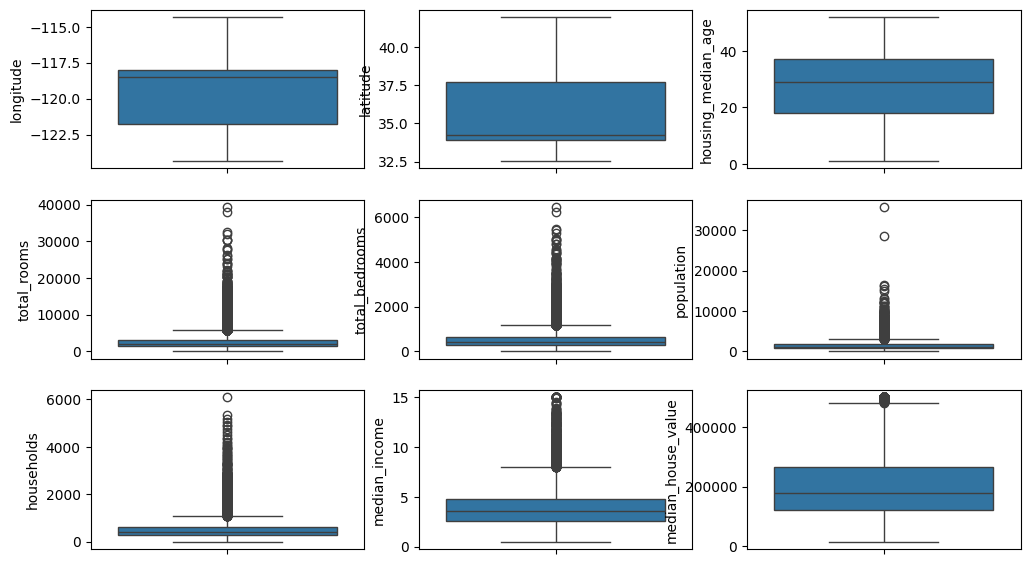

In [19]:
f, graficos = plt.subplots (3, 3, figsize = (12,7))
linha = 0
coluna = 0

for i in dados6.drop(['<1H OCEAN', 'ISLAND', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], axis = 1):
  sns.boxplot(data = dados6, y=i, ax=graficos[linha][coluna])
  plt.ylabel(i)
  coluna += 1
  if coluna == 3:
    linha += 1
    coluna = 0

plt.show()

#### Tratando Outlier

In [21]:
dados7_1 = dados6.copy()

In [22]:
dados7_1.drop(dados7_1.loc[dados7_1['households'] > 3000].index, inplace = True)

In [23]:
dados7_1.drop(dados7_1.loc[dados7_1['total_rooms'] > 20000].index, inplace = True)

In [24]:
dados7_1.drop(dados7_1.loc[dados7_1['total_bedrooms'] > 3000].index, inplace = True)

In [25]:
dados7_1.drop(dados7_1.loc[dados7_1['population'] > 10000].index, inplace = True)

In [26]:
dados7_1.reset_index(drop=True, inplace=True)
dados7_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20565,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20566,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20567,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20568,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


##### Nova visualização do boxplot

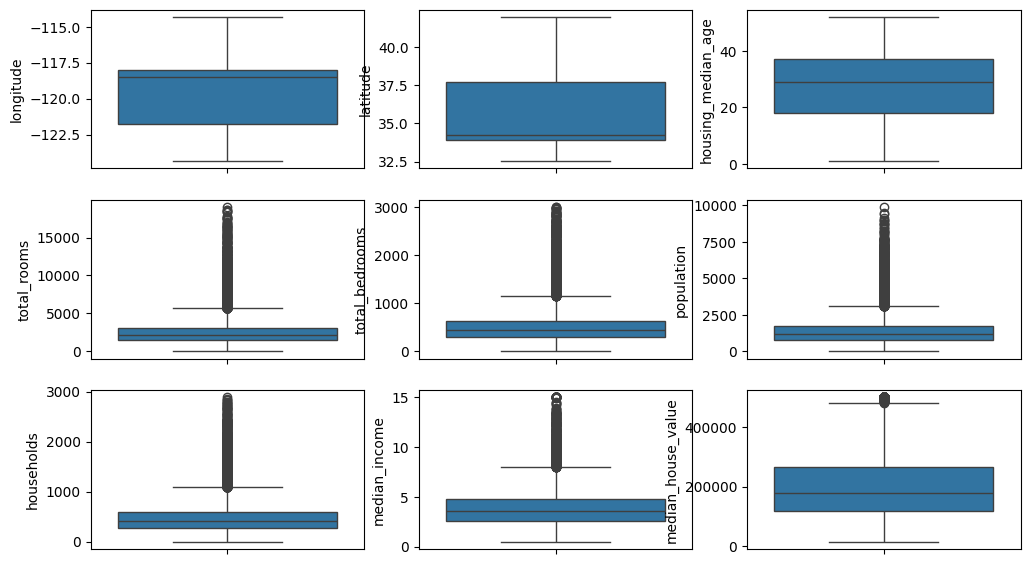

In [27]:
f, graficos = plt.subplots (3, 3 , figsize = (12,7))
linha = 0
coluna = 0

for i in dados7_1.drop(['<1H OCEAN', 'ISLAND', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], axis = 1):
  sns.boxplot(data = dados7_1, y=i, ax=graficos[linha][coluna])
  coluna += 1
  if coluna == 3:
    linha += 1
    coluna = 0

plt.show()

## Visualisar dados

### Tipos das colunas

In [31]:
# descobrir os tipos das colunas
dados7_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20570 entries, 0 to 20569
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20570 non-null  float64
 1   latitude            20570 non-null  float64
 2   housing_median_age  20570 non-null  float64
 3   total_rooms         20570 non-null  float64
 4   total_bedrooms      20570 non-null  float64
 5   population          20570 non-null  float64
 6   households          20570 non-null  float64
 7   median_income       20570 non-null  float64
 8   median_house_value  20570 non-null  float64
 9   <1H OCEAN           20570 non-null  float64
 10  INLAND              20570 non-null  float64
 11  ISLAND              20570 non-null  float64
 12  NEAR BAY            20570 non-null  float64
 13  NEAR OCEAN          20570 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [29]:
# linhas e colunas
dados7_1.shape

(20570, 14)

In [30]:
# metricas do datasets
dados7_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000,20570.000000
mean,-119.572519,35.634260,28.701847,2577.559407,525.685464,1397.508945,489.575450,3.869526,206809.842489,0.442440,0.317258,0.000243,0.111230,0.128828
std,2.003387,2.136265,12.555390,1904.582849,370.059343,988.512044,338.750939,1.900822,115448.509476,0.496688,0.465420,0.015589,0.314424,0.335018
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1446.000000,297.000000,786.000000,279.000000,2.562500,119400.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.260000,29.000000,2122.000000,435.000000,1163.500000,408.000000,3.532750,179600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3130.750000,640.000000,1717.750000,601.000000,4.742500,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,19001.000000,2996.000000,9879.000000,2885.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizar correlação entre colunas

### Gráfico de dispercao

#### Relação de latitude e longitude com median_house_value

<Axes: xlabel='latitude', ylabel='longitude'>

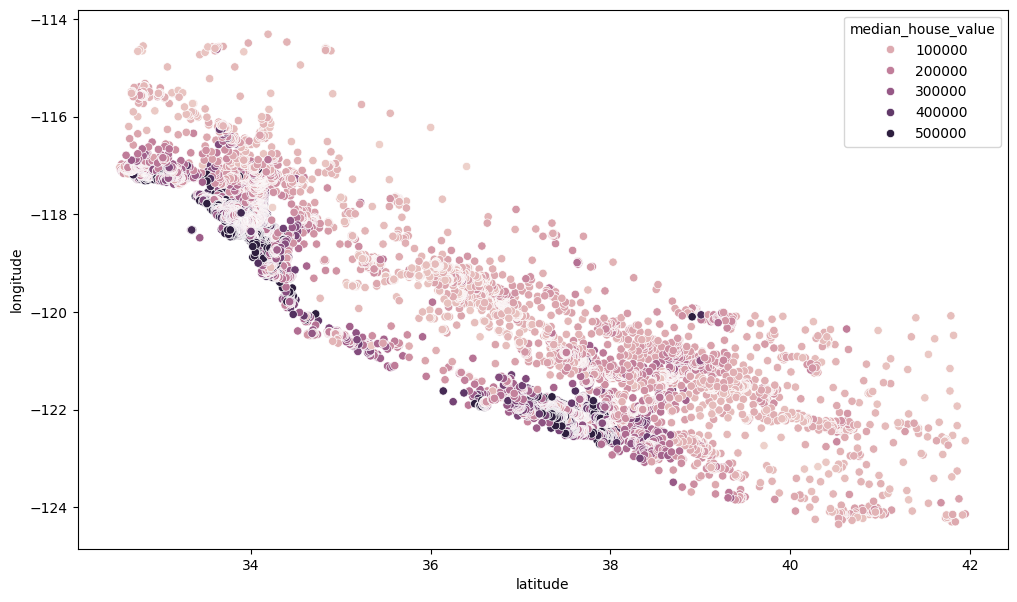

In [32]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'latitude', y = 'longitude', data = dados7_1, hue = 'median_house_value')

### Gráfico de Barra

#### Definir intervalos

In [33]:
quartos_grupos = pd.cut(dados7_1['total_bedrooms'], bins = 50)
dados7_2 = dados7_1.copy()
dados7_2['groups_total_bedrooms'] = quartos_grupos
dados7_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,groups_total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,"(120.8, 180.7]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,"(1079.2, 1139.1]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,"(180.7, 240.6]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,"(180.7, 240.6]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,"(240.6, 300.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20565,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,"(360.4, 420.3]"
20566,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,"(120.8, 180.7]"
20567,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,"(480.2, 540.1]"
20568,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,"(360.4, 420.3]"


In [34]:
populacao_grupos = pd.cut(dados7_2['population'], bins = 50)
dados7_3 = dados7_2.copy()
dados7_3['groups_population'] = populacao_grupos
dados7_3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,groups_total_bedrooms,groups_population
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,"(120.8, 180.7]","(200.52, 398.04]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,"(1079.2, 1139.1]","(2373.24, 2570.76]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,"(180.7, 240.6]","(398.04, 595.56]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,"(180.7, 240.6]","(398.04, 595.56]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,"(240.6, 300.5]","(398.04, 595.56]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20565,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,"(360.4, 420.3]","(793.08, 990.6]"
20566,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,"(120.8, 180.7]","(200.52, 398.04]"
20567,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,"(480.2, 540.1]","(990.6, 1188.12]"
20568,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,"(360.4, 420.3]","(595.56, 793.08]"


### Gráfico de correlação

In [35]:
dados7_3.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20570 entries, 0 to 20569
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   longitude              20570 non-null  float64 
 1   latitude               20570 non-null  float64 
 2   housing_median_age     20570 non-null  float64 
 3   total_rooms            20570 non-null  float64 
 4   total_bedrooms         20570 non-null  float64 
 5   population             20570 non-null  float64 
 6   households             20570 non-null  float64 
 7   median_income          20570 non-null  float64 
 8   median_house_value     20570 non-null  float64 
 9   <1H OCEAN              20570 non-null  float64 
 10  INLAND                 20570 non-null  float64 
 11  ISLAND                 20570 non-null  float64 
 12  NEAR BAY               20570 non-null  float64 
 13  NEAR OCEAN             20570 non-null  float64 
 14  groups_total_bedrooms  20570 non-null 

#### Definindo correlação

In [36]:
lista_corr = ["median_house_value", "population", "housing_median_age", "total_rooms", "total_bedrooms",
              "households", "median_income", "latitude", "longitude", "<1H OCEAN", "INLAND", "ISLAND",
              "NEAR BAY", "NEAR OCEAN"]
corr_dados = dados7_3[lista_corr].corr()
display(corr_dados)

,median_house_value,population,housing_median_age,total_rooms,total_bedrooms,households,median_income,latitude,longitude,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
median_house_value,1.000000,-0.030538,0.106652,0.149087,0.052737,0.069760,0.688153,-0.144150,-0.046135,0.256583,-0.484901,0.023451,0.160413,0.141598
population,-0.030538,1.000000,-0.299057,0.841002,0.867008,0.903387,-0.000863,-0.116321,0.105022,0.078918,-0.023036,-0.011507,-0.061778,-0.026484
housing_median_age,0.106652,-0.299057,1.000000,-0.367980,-0.318190,-0.300508,-0.118205,0.009478,-0.106334,0.045883,-0.237116,0.017012,0.254815,0.021442
total_rooms,0.149087,0.841002,-0.367980,1.000000,0.914896,0.907699,0.216471,-0.031376,0.038390,-0.008005,0.027469,-0.008211,-0.017187,-0.009781
total_bedrooms,0.052737,0.867008,-0.318190,0.914896,1.000000,0.972981,-0.015471,-0.064898,0.065517,0.015268,-0.008990,-0.004436,-0.012758,0.002033
households,0.069760,0.903387,-0.300508,0.907699,0.972981,1.000000,0.008141,-0.071370,0.052314,0.042549,-0.044713,-0.009803,-0.003587,0.002859
median_income,0.688153,-0.000863,-0.118205,0.216471,-0.015471,0.008141,1.000000,-0.079556,-0.015599,0.168768,-0.237487,-0.009230,0.056631,0.026994
latitude,-0.144150,-0.116321,0.009478,-0.031376,-0.064898,-0.071370,-0.079556,1.000000,-0.924666,-0.447115,0.351078,-0.016615,0.358887,-0.160904
longitude,-0.046135,0.105022,-0.106334,0.038390,0.065517,0.052314,-0.015599,-0.924666,1.000000,0.321423,-0.055508,0.009484,-0.474724,0.045683
<1H OCEAN,0.256583,0.078918,0.045883,-0.008005,0.015268,0.042549,0.168768,-0.447115,0.321423,1.000000,-0.607239,-0.013890,-0.315136,-0.342559


<Axes: >

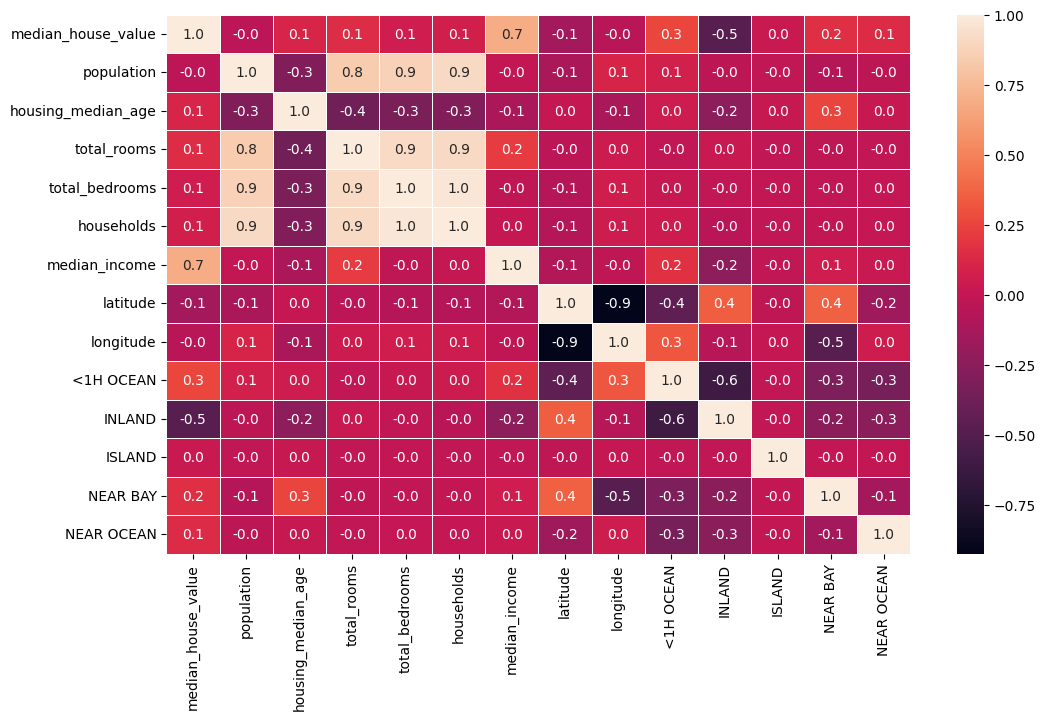

In [37]:
plt.figure(figsize = (12, 7))
sns.heatmap(corr_dados, annot = True, fmt=".1f", linewidths=.6)

# Etapa II

## Features Mantidas:
  - Longitude / latitude: Assim como mostrado pelo gráfico de dispersão feito na etapa de visualização de dados, a localização de uma casa pode valorizar/desvalorizar o valor da mesma;

  - Total_rooms: Uma casa normalmente tende a ter um maior valor comercial a depender da quantidade de comôdos que a mesma possui;

  - Population: A depender do tamanho da população de um lugar, a busca por imóveis pode variar, influenciando o preço dos imoveis locais pela lei de oferta e demanda;

  - Households: O tamanho de uma família implica em algumas necessidades, como possivelmente uma casa com mais/menos cômodos;

  - Median_income: Quanto maior a condição financeira de uma pessoa, maior a capacidade de aquisição de bens da mesma;    

  - <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN: a localização de uma casa tem influência direta em sua valorização no mercado;            

## Features retiradas:
  - Housing_median_age (no caso do DataFrame fornecido, não tem como diferenciar entre uma casa antiga bem valorizada (por ser bem construída,possuir patrimônios históricos, etc) e uma mal valorizada (por estar mal conservada, construída, etc). Uma casa ser antiga não implica que ela é necessariamente pouco valorizada, assim como ser nova não significa ser bem valorizada, outros fatores devem ser levados em conta;

  - Total_bedrooms: Apesar de incialmente acreditar ser uma feature relevante, a IA apresentou um melhor desempenho sem a presença deste fator, creio que possa ser devido a redundância de dados em relação a Total_rooms ; ****

  - Groups_population: Grupos divisão de divisão de "population";

  - Groups_total_bedrooms: Grupos de divisão de "total_bedrooms";

## Target:
  - Median_house_value.


# Etapa III

## Treinamento da IA

In [ ]:
dados7_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20570 entries, 0 to 20569
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   longitude              20570 non-null  float64 
 1   latitude               20570 non-null  float64 
 2   housing_median_age     20570 non-null  float64 
 3   total_rooms            20570 non-null  float64 
 4   total_bedrooms         20570 non-null  float64 
 5   population             20570 non-null  float64 
 6   households             20570 non-null  float64 
 7   median_income          20570 non-null  float64 
 8   median_house_value     20570 non-null  float64 
 9   <1H OCEAN              20570 non-null  float64 
 10  INLAND                 20570 non-null  float64 
 11  ISLAND                 20570 non-null  float64 
 12  NEAR BAY               20570 non-null  float64 
 13  NEAR OCEAN             20570 non-null  float64 
 14  groups_total_bedrooms  20570 non-null 

### Importanto bilbiotecas

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Separação das variáveis

In [ ]:
X = dados7_3.drop(['median_house_value', 'housing_median_age', 'total_bedrooms', 'groups_population', 'groups_total_bedrooms'], axis = 1)
y = dados7_3['median_house_value']

In [ ]:
variaveis_p_previsao = X.columns.tolist()
variaveis_p_previsao

['longitude',
 'latitude',
 'total_rooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Criação da IA

#### Método de treinamento

In [ ]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Teste de acertividade da IA

In [ ]:
predicao_model = model.predict(X_test)
taxa_de_acerto = metrics.r2_score(y_test, predicao_model)
print('porcentagem de acerto:', taxa_de_acerto*100)

porcentagem de acerto: 82.63798805081443


##### Faixa erro da minha IA
calculado comparando os resultados obtidos pela IA e os valores do df

In [ ]:
model_RMSE = np.sqrt(mean_squared_error(y_test, predicao_model))
model_RMSE

48151.901746667776

##### Gráfico de previsões

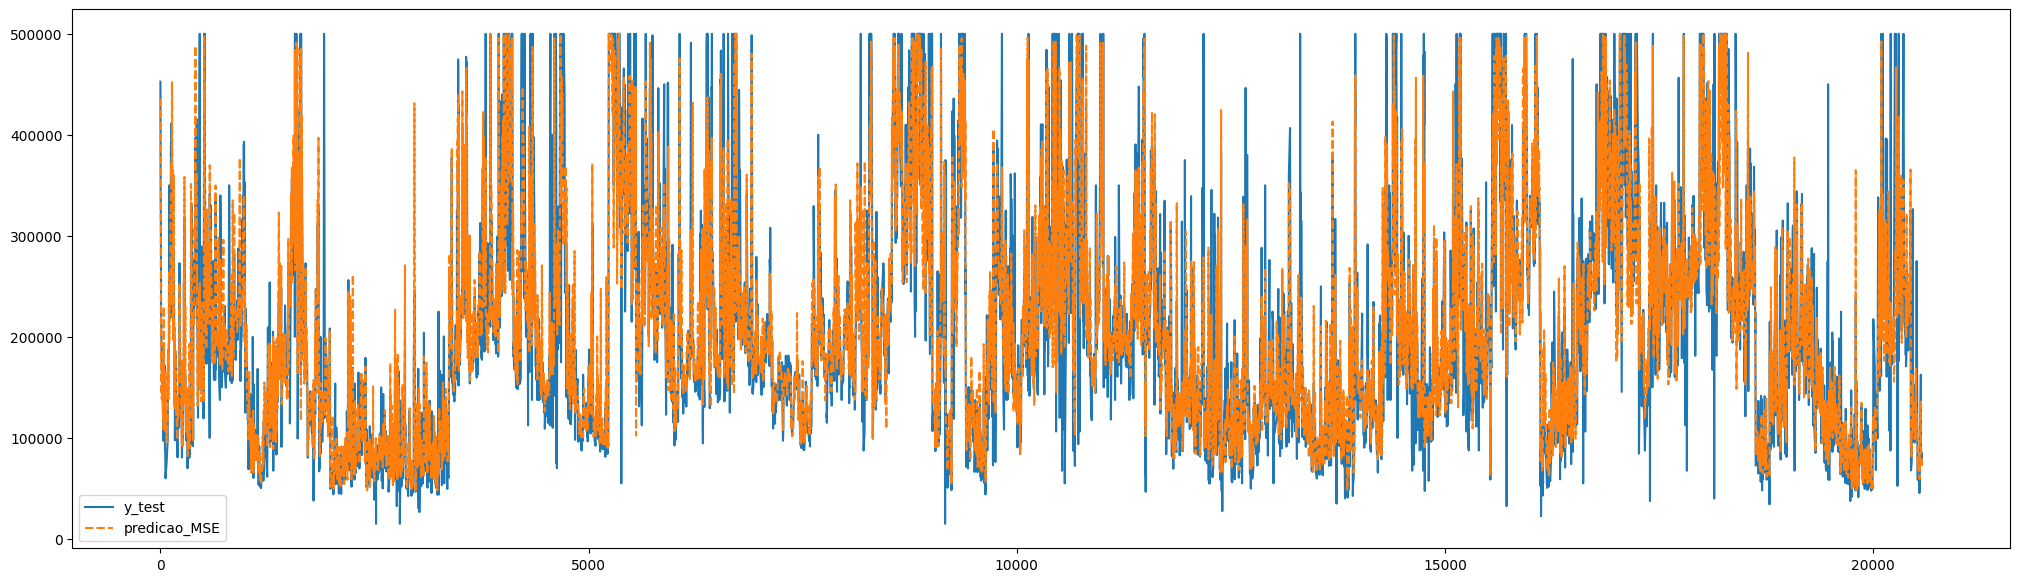

In [ ]:
grafico = pd.DataFrame()
grafico['y_test'] = y_test
grafico['predicao_MSE'] = predicao_model

plt.figure(figsize=(25,7))
sns.lineplot(data = grafico)
plt.show()

##### Variavel para salvamento

In [ ]:
model_e_variaveis = [model, variaveis_p_previsao]
model_e_variaveis

[RandomForestRegressor(random_state=42),
 ['longitude',
  'latitude',
  'total_rooms',
  'population',
  'households',
  'median_income',
  '<1H OCEAN',
  'INLAND',
  'ISLAND',
  'NEAR BAY',
  'NEAR OCEAN']]

# Etapa IV


## Salvando IA (MSE)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Documentos/modelo_IA_e_variaveis.pkl', 'wb') as arquivo:
  pickle.dump(model_e_variaveis, arquivo)

## Dentro do VScode

### Carregar o arquivo

In [ ]:
import pickle
with open('/content/drive/MyDrive/Documentos/modelo_IA_e_variaveis.pkl', 'rb') as arquivo:
  dados = pickle.load(arquivo)
  IA = dados[0]
  variaveis = dados[1]

### Pedir os dados para previsão

#### Criar DataFrame para inserir os dados que serão analisados

In [ ]:
df_variaveis = pd.DataFrame(columns = variaveis)
df_variaveis

,longitude,latitude,total_rooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN


#### Pedir os dados e armazenar no dataframe

In [ ]:
lista_resposta = []
for features in variaveis:
  resposta = input(f"Insira o valor para a coluna {features}: ")
  lista_resposta.append(resposta)

Insira o valor para a coluna longitude: 512
Insira o valor para a coluna latitude: 132
Insira o valor para a coluna total_rooms: 100
Insira o valor para a coluna population: 1000
Insira o valor para a coluna households: 900
Insira o valor para a coluna median_income: 2000
Insira o valor para a coluna <1H OCEAN: 0
Insira o valor para a coluna INLAND: 0
Insira o valor para a coluna ISLAND: 0
Insira o valor para a coluna NEAR BAY: 0
Insira o valor para a coluna NEAR OCEAN: 1


In [ ]:
lista_resposta

['512', '132', '100', '1000', '900', '2000', '0', '0', '0', '0', '1']

In [ ]:
df_variaveis.loc[len(df_variaveis)] = lista_resposta
df_variaveis

,longitude,latitude,total_rooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,512,132,100,1000,900,2000,0,0,0,0,1


In [ ]:
df_variaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   longitude      1 non-null      object
 1   latitude       1 non-null      object
 2   total_rooms    1 non-null      object
 3   population     1 non-null      object
 4   households     1 non-null      object
 5   median_income  1 non-null      object
 6   <1H OCEAN      1 non-null      object
 7   INLAND         1 non-null      object
 8   ISLAND         1 non-null      object
 9   NEAR BAY       1 non-null      object
 10  NEAR OCEAN     1 non-null      object
dtypes: object(11)
memory usage: 204.0+ bytes


#### Testando IA

In [ ]:
previsao_model = IA.predict(df_variaveis)
display(df_variaveis)
print(f"Valor estimado: U${previsao_IA.item()}")

,longitude,latitude,total_rooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,512,132,100,1000,900,2000,0,0,0,0,1


Valor estimado: U$374052.28
